In [1]:
import pandas as pd

In [2]:
all_results = pd.read_excel("reports/RESULTS.xlsx")

In [3]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   optimizer            22 non-null     object 
 1   lr                   22 non-null     float64
 2   loss_criterion       22 non-null     object 
 3   num_epochs           22 non-null     int64  
 4   batch_size           22 non-null     int64  
 5   patience             22 non-null     int64  
 6   Description          22 non-null     object 
 7   image_type           22 non-null     object 
 8   Training Accuracy    22 non-null     float64
 9   Validation Accuracy  22 non-null     float64
 10  Test Accuracy        22 non-null     float64
 11  DATETIME             22 non-null     object 
 12  weight_decay         0 non-null      float64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.4+ KB


In [4]:
all_results = all_results.query('num_epochs >= 10')


In [6]:
df = all_results

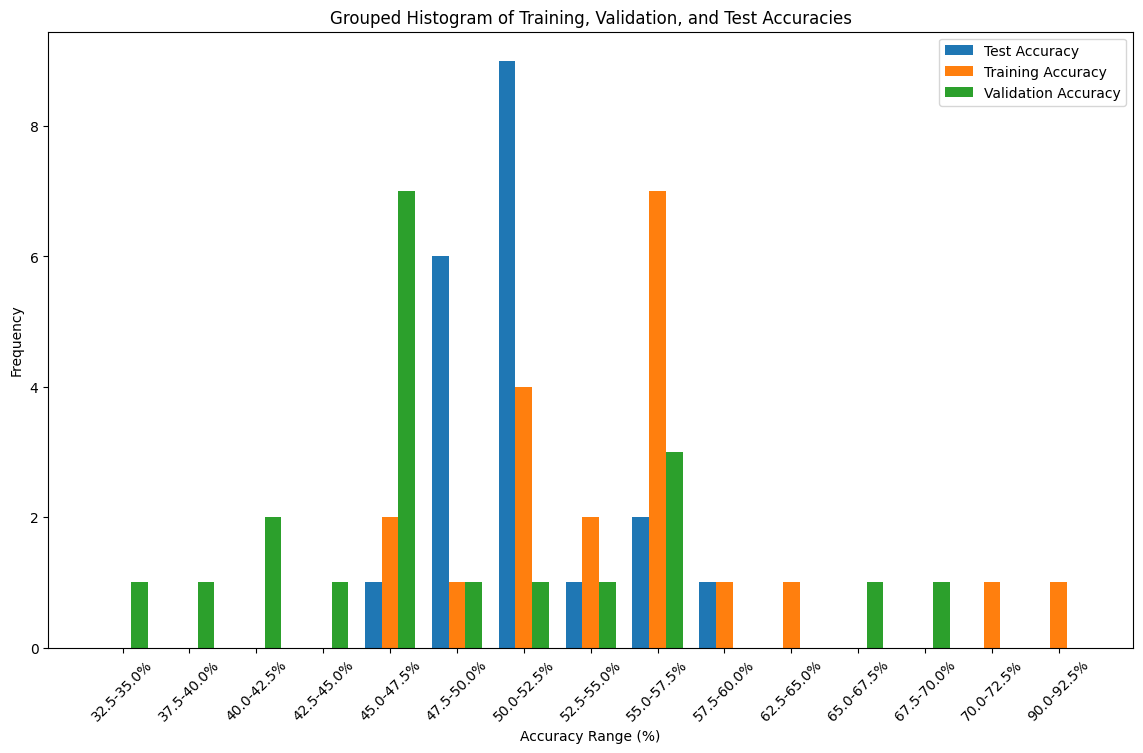

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Define the categorization function
def categorize_accuracy(val):
    return f"{int(val // 2.5) * 2.5}-{int(val // 2.5) * 2.5 + 2.5}%"

# Apply the categorization
for column in ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']:
    df[column + ' Category'] = df[column].apply(categorize_accuracy)

# Create a plot data DataFrame
plot_data = pd.melt(df, id_vars=[], value_vars=['Training Accuracy Category', 'Validation Accuracy Category', 'Test Accuracy Category'],
                    var_name='Type', value_name='Accuracy Range')

# Organize data for plotting
grouped = plot_data.groupby(['Accuracy Range', 'Type']).size().unstack().fillna(0)

# Plot settings
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.25  # width of bars
ind = np.arange(len(grouped))  # the x locations for the groups
shift = np.array([-width, 0, width])  # shifts for each type to group them

# Plotting each type
for i, column in enumerate(grouped.columns):
    ax.bar(ind + shift[i], grouped[column], width, label=column.replace(' Category', ''))

# Formatting plot
ax.set_xlabel('Accuracy Range (%)')
ax.set_ylabel('Frequency')
ax.set_title('Grouped Histogram of Training, Validation, and Test Accuracies')
ax.set_xticks(ind)
ax.set_xticklabels(grouped.index, rotation=45)
ax.legend()

plt.show()